**Imports**

In [1]:
import numpy as np
import pandas as pd
import os

**Loading in the data**

In [2]:
df = pd.read_csv('scraped_dice_job_listings_attributes.csv')
df.head()

,job_listing,original_date_posted,skills,company_name,job_city,job_region,job_postal_code,intext_job_title,intext_company_name,intext_date_posted,...,intext_skills,coding_languages,technologies,methodologies,operating_systems,remote,years_experience,date_of_processing,salary,URL
0,Senior Data Scientist,2021-06-28T22:17:51Z,"Artificial Intelligence, Python, IT, SAS, SQL,...",New York Life Insurance Company,New York,NY,10001,Senior Data Scientist,New York Life Insurance Company,NaN,...,"machine learning, model deployment, sales, tec...","sas, r, processing, spark, lasso, sql, python",NaN,incremental,NaN,False,3 to 5,6292021,NaN,https://www.dice.com/jobs/detail/Senior-Data-S...
1,Data Scientist,2021-06-01T00:32:45Z,"Research, Computer, Programming, Python, Java,...",comScore,Amsterdam,NaN,12010,Data Scientist,comScore,NaN,...,"machine learning, online advertising, clusteri...","scala, r, javascript, source, java, sql, python",NaN,NaN,NaN,False,2,6292021,NaN,https://www.dice.com/jobs/detail/Data-Scientis...
2,Data Scientist,2021-06-09T18:16:51Z,"Data, collect, clean, analyze",University Of Delaware,Newark,DE,19702,Data Scientist,University Of Delaware,6/15/2021,...,"sas, data analysis, algorithms, r, writing, ma...","sas, r, stata, clean, sql, python",NaN,NaN,college,False,3 to 5,6292021,NaN,https://www.dice.com/jobs/detail/Data-Scientis...
3,Principal Data Scientist - Search,2021-04-30T23:30:59Z,"Algorithms, Engineers, Python, Java, Data Mini...",Walmart,Sunnyvale,CA,94086,Principal Data Scientist,Search,6/29/2021,...,"machine learning, cadence, online advertising,...","plus, scala, r, ml, source, java, spark, python",tensorflow,NaN,NaN,False,3 to 7,6292021,NaN,https://www.dice.com/jobs/detail/Principal-Dat...
4,Data Scientist - Entry Level,2021-05-07T00:30:18Z,"Laboratory, Security, Applications, Java, Pyth...",Lawrence Livermore National Laboratory,Livermore,CA,94550,Data Scientist,Entry Level,NaN,...,"database, machine learning, research and devel...","r, matlab, c, python, java, q, c++, processing",NaN,NaN,linux,False,NaN,6292021,NaN,https://www.dice.com/jobs/detail/Data-Scientis...


Taking a look at how many listings there are in total

In [3]:
df.shape[0]

22254

There are 22,254 tech listings in the dataset

**Filter by only containing Data Scientist in the dataset**

In [4]:
# Create boolean masks to get the job titles that contain data scientist
mask1 = df['job_listing'].apply(lambda x: ('data scientist' in str(x).lower()))
mask2 = df['job_listing'].apply(lambda x: ('data science' in str(x).lower()))
mask3 = df['intext_job_title'].apply(lambda x: ('data scientist' in str(x).lower()))
mask4 = df['intext_job_title'].apply(lambda x: ('data science' in str(x).lower()))

In [5]:
# Save to a new dataset
df = df[mask1 | mask2 | mask3 | mask4]
df = df.reset_index(drop=True)
df.head()

,job_listing,original_date_posted,skills,company_name,job_city,job_region,job_postal_code,intext_job_title,intext_company_name,intext_date_posted,...,intext_skills,coding_languages,technologies,methodologies,operating_systems,remote,years_experience,date_of_processing,salary,URL
0,Senior Data Scientist,2021-06-28T22:17:51Z,"Artificial Intelligence, Python, IT, SAS, SQL,...",New York Life Insurance Company,New York,NY,10001,Senior Data Scientist,New York Life Insurance Company,NaN,...,"machine learning, model deployment, sales, tec...","sas, r, processing, spark, lasso, sql, python",NaN,incremental,NaN,False,3 to 5,6292021,NaN,https://www.dice.com/jobs/detail/Senior-Data-S...
1,Data Scientist,2021-06-01T00:32:45Z,"Research, Computer, Programming, Python, Java,...",comScore,Amsterdam,NaN,12010,Data Scientist,comScore,NaN,...,"machine learning, online advertising, clusteri...","scala, r, javascript, source, java, sql, python",NaN,NaN,NaN,False,2,6292021,NaN,https://www.dice.com/jobs/detail/Data-Scientis...
2,Data Scientist,2021-06-09T18:16:51Z,"Data, collect, clean, analyze",University Of Delaware,Newark,DE,19702,Data Scientist,University Of Delaware,6/15/2021,...,"sas, data analysis, algorithms, r, writing, ma...","sas, r, stata, clean, sql, python",NaN,NaN,college,False,3 to 5,6292021,NaN,https://www.dice.com/jobs/detail/Data-Scientis...
3,Principal Data Scientist - Search,2021-04-30T23:30:59Z,"Algorithms, Engineers, Python, Java, Data Mini...",Walmart,Sunnyvale,CA,94086,Principal Data Scientist,Search,6/29/2021,...,"machine learning, cadence, online advertising,...","plus, scala, r, ml, source, java, spark, python",tensorflow,NaN,NaN,False,3 to 7,6292021,NaN,https://www.dice.com/jobs/detail/Principal-Dat...
4,Data Scientist - Entry Level,2021-05-07T00:30:18Z,"Laboratory, Security, Applications, Java, Pyth...",Lawrence Livermore National Laboratory,Livermore,CA,94550,Data Scientist,Entry Level,NaN,...,"database, machine learning, research and devel...","r, matlab, c, python, java, q, c++, processing",NaN,NaN,linux,False,NaN,6292021,NaN,https://www.dice.com/jobs/detail/Data-Scientis...


In [6]:
df.shape

(863, 22)

There are 863 rows that contain a data scientist listing

In [7]:
# All the different column names
[print(col) for col in df.columns];

job_listing
original_date_posted
skills
company_name
job_city
job_region
job_postal_code
intext_job_title
intext_company_name
intext_date_posted
intext_location
get_education_level
intext_skills
coding_languages
technologies
methodologies
operating_systems
remote
years_experience
date_of_processing
salary
URL


These are all the columns in the dataset

**Save the dataset**

In [8]:
#df.to_csv('data_scientist.csv', index=False)

## Creating seperate datasets for seperate visuals

### Dataset containing programming languages

In [9]:
def get_attributes(df):
    """Function to get the values from each row that is stored in a list"""
    result_dict = {}
    for i in range(df.shape[0]):
        attr_list = str(df.iloc[i]).replace(',','').split()
        for attr in set(attr_list):
            if result_dict.get(attr) is None:
                result_dict[attr] = 1
            else:
                result_dict[attr] += 1
    return result_dict

In [10]:
### Getting the programming languages
programming_languages = get_attributes(df['coding_languages'])
programming_languages

{'python': 657,
 'r': 382,
 'sas': 116,
 'spark': 191,
 'processing': 234,
 'lasso': 4,
 'sql': 445,
 'java': 162,
 'scala': 91,
 'javascript': 29,
 'source': 90,
 'clean': 26,
 'stata': 8,
 'ml': 141,
 'plus': 113,
 'q': 4,
 'c': 32,
 'matlab': 49,
 'c++': 56,
 'b': 6,
 't': 7,
 'small': 58,
 'julia': 9,
 'elasticsearch': 21,
 'nosql': 38,
 'bash': 11,
 'shell': 24,
 'signal': 15,
 'pipelines': 106,
 'mysql': 44,
 'dc': 8,
 'self': 10,
 'goal': 29,
 'cool': 2,
 'rest': 21,
 'c#': 16,
 's3': 34,
 'oracle': 41,
 'reason': 30,
 'simple': 13,
 'rapid': 17,
 'nan': 36,
 'context': 27,
 'sr': 15,
 'postgresql': 10,
 'e': 8,
 'php': 2,
 's': 18,
 'go': 26,
 'flex': 3,
 'server': 10,
 'microsoft': 13,
 'perl': 11,
 'linc': 6,
 'd': 7,
 'lean': 9,
 'xslt': 4,
 'xml': 9,
 'pilot': 5,
 'sqlite': 2,
 'css': 3,
 'ead': 1,
 'unix': 3,
 'access': 3,
 'ladder': 1,
 'planner': 1,
 'f': 2,
 'postgre': 1,
 'scratch': 14,
 'j': 1,
 'gams': 2,
 'gap': 7,
 'script': 5,
 'language': 1,
 'query': 1,
 'cypher

In [11]:
# Convert from a dictionary to dataframe
df_programming = pd.DataFrame.from_dict(programming_languages, orient='index', columns=['Occurrence'])
# Sorting the data by descending
df_programming = df_programming.sort_values(by='Occurrence', ascending=False) 
df_programming

,Occurrence
python,657
sql,445
r,382
processing,234
spark,191
...,...
db2,1
arc,1
sol,1
sharp,1


**Saving dataset**

In [12]:
#df_programming.to_csv('programming_languages_count.csv')

### Dataset containing the most common technologies

In [13]:
technologies = get_attributes(df['technologies'])
technologies

{'nan': 578,
 'tensorflow': 123,
 'pytorch': 92,
 'aws': 163,
 'kubeflow': 12,
 'jira': 18,
 'notebooks': 7,
 'jupyter': 24,
 'notebook': 5,
 'radar': 4,
 'kubernetes': 11,
 'angular': 1,
 'gcp': 7,
 'jmp': 2,
 'eclipse': 1}

In [14]:
# Convert from a dictionary to dataframe
df_tech = pd.DataFrame.from_dict(technologies, orient='index', columns=['Occurrence'])
# Sorting the data by descending
df_tech = df_tech.sort_values(by='Occurrence', ascending=False) 
df_tech

,Occurrence
nan,578
aws,163
tensorflow,123
pytorch,92
jupyter,24
jira,18
kubeflow,12
kubernetes,11
notebooks,7
gcp,7


**Saving the dataset**

In [15]:
#df_tech.to_csv('technologies_count.csv')

### Getting the most common kinds of methodologies

In [16]:
methods = get_attributes(df['methodologies'])
methods

{'incremental': 8,
 'nan': 639,
 'agile': 96,
 'continuous': 9,
 'integration': 9,
 'version': 49,
 'control': 49,
 'ci/cd': 29,
 'prototyping': 27,
 'scrum': 17,
 'software': 7,
 'development': 8,
 'object-oriented': 5,
 'programming': 7,
 'oop': 7,
 'git': 53,
 'd3': 14,
 'github': 21,
 'gitlab': 4,
 'sbd': 1,
 'literate': 1,
 'tdd': 3,
 'lean': 1,
 'functional': 1}

In [17]:
# Convert from a dictionary to dataframe
df_methods = pd.DataFrame.from_dict(methods, orient='index', columns=['Occurrence'])
# Sorting the data by descending
df_methods = df_methods.sort_values(by='Occurrence', ascending=False) 
df_methods

,Occurrence
nan,639
agile,96
git,53
version,49
control,49
ci/cd,29
prototyping,27
github,21
scrum,17
d3,14


**Saving the dataset**

In [18]:
#df_methods.to_csv('methods_count.csv')

### Getting the most common Operating Systems

In [19]:
o_s = get_attributes(df['operating_systems'])
o_s

{'nan': 452,
 'college': 18,
 'linux': 51,
 'vision': 149,
 'hive': 75,
 'root': 12,
 'monitor': 61,
 'os': 1,
 'mac': 1,
 'spring': 7,
 'nexus': 1,
 'acp': 8,
 'operator': 1,
 'master': 28,
 'go': 26,
 'mos': 8,
 'scope': 51,
 'yes': 10,
 'svm': 14,
 'posted': 1,
 'pilot': 5,
 'athena': 14,
 'std': 2,
 'vector': 15,
 'android': 3,
 'eagle': 1,
 'shark': 1,
 'sol': 1,
 'centos': 1,
 'foresight': 1,
 'rock': 1,
 'express': 2,
 'max': 2,
 'aurora': 3,
 'synapse': 1,
 'tunes': 1,
 'amber': 9,
 'miracle': 1,
 'neos': 1}

Opperating systems is too sparse so I will not be using it

In [20]:
# Convert from a dictionary to dataframe
df_os = pd.DataFrame.from_dict(o_s, orient='index', columns=['Occurrence'])
# Sorting the data by descending
df_os = df_os.sort_values(by='Occurrence', ascending=False) 
df_os

,Occurrence
nan,452
vision,149
hive,75
monitor,61
linux,51
scope,51
master,28
go,26
college,18
vector,15


### Getting the most common Skills

**Skills mentioned in the ad**

In [21]:
skills1 = get_attributes(df['skills'])
# Convert from a dictionary to dataframe
df_skills1 = pd.DataFrame.from_dict(skills1, orient='index', columns=['Occurrence'])
# Sorting the data by descending
df_skills1 = df_skills1.sort_values(by='Occurrence', ascending=False) 
df_skills1

,Occurrence
Python,538
SQL,353
Data,241
Computer,199
Engineering,153
...,...
POSTMAN,1
wi-fi,1
connectivity,1
telematics,1


**Save the dataset**

In [23]:
#df_skills1.to_csv('skills1.csv')

**Skills mentioned in the listing itself**

In [24]:
skills2 = get_attributes(df['intext_skills'])
# Convert from a dictionary to dataframe
df_skills2 = pd.DataFrame.from_dict(skills2, orient='index', columns=['Occurrence'])
# Sorting the data by descending
df_skills2 = df_skills2.sort_values(by='Occurrence', ascending=False) 
df_skills2

,Occurrence
data,716
python,657
science,631
learning,586
machine,561
...,...
defect,1
v-model,1
peoplesoft,1
graphics,1


**Saving dataset**

In [26]:
#df_skills2.to_csv('skills2.csv')

## Education Level

**Min degree**

In [27]:
education_dict_min = {"Associate's" : 0, "Bachelor's" : 0, "Masters" : 0, "PhD" : 0}

In [28]:
for i in range(df.shape[0]):
    try:
        temp = df['get_education_level'].iloc[i]

        degree = str(temp.split()[0])
        education_dict_min[degree] += 1
    except:
        pass
    
education_dict_min

{"Associate's": 25, "Bachelor's": 763, 'Masters': 72, 'PhD': 0}

**Degree Range**

In [30]:
education_dict_range = {"Associate's" : 0, "Bachelor's" : 0, "Masters" : 0, "PhD" : 0}

Too lazy to make a better function. Sorry not sorry

In [31]:
education_dict_range = {"Associate's" : 0, "Bachelor's" : 0, "Masters" : 0, "PhD" : 0}

for i in range(df.shape[0]):
    try:
        temp = df['get_education_level'].iloc[i].replace(' - ',' ')

        degree = temp.split()
        #print(degree[-1] == "PhD")
        if len(degree) == 1:
            education_dict_range[degree] += 1
            continue    
        if (degree[0] == "Associate's") and (degree[-1] == "Masters"):
            education_dict_range["Associate's"] += 1
            education_dict_range["Bachelor's"] += 1
            education_dict_range["Masters"] += 1
            continue
        if (degree[0] == "Associate's") and (degree[-1] == "Bachelor's"):
            education_dict_range["Associate's"] += 1
            education_dict_range["Bachelor's"] += 1
            continue
        if (degree[0] == "Associate's") and (degree[-1] == "PhD"):
            education_dict_range["Associate's"] += 1
            education_dict_range["Bachelor's"] += 1
            education_dict_range["Masters"] += 1
            education_dict_range["PhD"] += 1
            continue 
        if (degree[0] == "Bachelor's") and (degree[-1] == "Masters"):
            education_dict_range["Bachelor's"] += 1
            education_dict_range["Masters"] += 1
            continue
        if (degree[0] == "Bachelor's") and (degree[-1] == "PhD"):
            education_dict_range["Bachelor's"] += 1
            education_dict_range["Masters"] += 1
            education_dict_range["PhD"] += 1
            continue
        if (degree[0] == "Masters") and (degree[-1] == "PhD"):
            education_dict_range["Masters"] += 1
            education_dict_range["PhD"] += 1
            continue
    except:
        pass
    
education_dict_range

{"Associate's": 25, "Bachelor's": 781, 'Masters': 781, 'PhD': 5}

In [32]:
pd.Series(education_dict_range)

Associate's     25
Bachelor's     781
Masters        781
PhD              5
dtype: int64

In [33]:
df_ed = pd.DataFrame.from_dict(education_dict_min, orient='index', columns=['Min'])
df_ed['Range'] = pd.Series(education_dict_range)
df_ed

,Min,Range
Associate's,25,25
Bachelor's,763,781
Masters,72,781
PhD,0,5


In [34]:
#df_ed.to_csv('education.csv')

### Getting the most common years of experience

In [35]:
def clean_YOE(text):
    try:
        if str(text[0]) == '0':
            fixed = ''
            temp = text.split()
            fixed = temp[2] + ' to ' + '1' + temp[0] 
            return fixed
        else:
            return text
    except:
        return text
    
df['years_experience'] = df['years_experience'].apply(clean_YOE)
df['years_experience']

0       3 to 5
1            2
2       3 to 5
3       3 to 7
4          NaN
        ...   
858          3
859     1 to 4
860    5 to 10
861          4
862    5 to 10
Name: years_experience, Length: 863, dtype: object

*Counting the years*

In [36]:
YOE_dict = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
for i in range(df.shape[0]):
    example = str(df['years_experience'].iloc[i])
    if (len(example) == 0) | (example is None):
        continue
    if len(example) == 1:
        YOE_dict[int(example)] += 1
    else:
        if example == 'nan':
            continue
        temp_list = example.split()
        start_num = int(temp_list[0])
        end_num = int(temp_list[-1])
        if start_num == end_num:
            YOE_dict[int(start_num)] += 1
            continue
        for i in range(start_num, end_num+1):
            YOE_dict[i] += 1
            
YOE_dict

{1: 71, 2: 208, 3: 319, 4: 228, 5: 270, 6: 121, 7: 122, 8: 90, 9: 58, 10: 54}

In [37]:
# Convert from a dictionary to dataframe
df_YOE = pd.DataFrame.from_dict(YOE_dict, orient='index', columns=['Occurrence'])
df_YOE

,Occurrence
1,71
2,208
3,319
4,228
5,270
6,121
7,122
8,90
9,58
10,54


**Saving data**

In [40]:
#df_YOE.to_csv('YOE_count.csv')

*Getting an idea of what it's going to look like*

<AxesSubplot:>

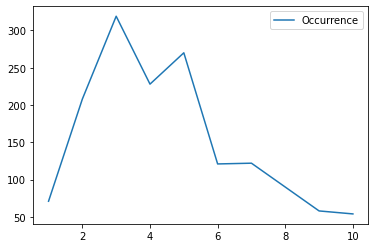

In [39]:
df_YOE.plot()